In [1]:
#Importo librerías necesarias
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import os

#Cuestiones previas:
###1. La forma de guardar la información de las masas es la siguiente:
+ Cada una tiene dos componentes: un vector $r$ (que contiene posición en $\hat{\textbf{i}}$ y $\hat{\textbf{j}}$) y un vector $v$ (que contiene velocidad en $\hat{\textbf{i}}$ y $\hat{\textbf{j}}$).
+ El array Y contiene la información de **todas** las masas en cuestión. El orden de la información contenida en este array es: [$r_1,v_1,r_2,v_2, \dots ,r_n,v_n$]. Definidos $r$ y $v$ como se explicó en el punto anterior.

###2. Utilizamos la siguiente fórmula para definir la interacción gravitacional (Asumiendo $G = 1$):

$$\\ m_i \frac{d^2x}{dt^2} = - \sum_{i \neq j} \frac{m_i m_j (x_i - x_j)}{r^3_{ij}}\\$$
$$i = 1, \dots , N$$

###3. Utilizamos la siguiente fórmula para definir la energía potencial gravitatoria( Asumiendo $G = 1$):

$$\\ U_G(r) = - \sum_{i \neq j} \frac{m_i m_j}{r}\\$$
$$i = 1, \dots , N$$

###4. Utilizamos la siguiente fórmula para definir la energía cinética:

$$\\ K(v) = \frac{m v^2}{2}$$

###5. Utilizamos la siguiente fórmula para definir la energía total:

$$\\ E = U + K$$

###6. Utilizamos el método de Runge-Kutta de orden 4 para resolver las ecuaciones diferenciales de movimiento. Recordando que este se basa en que:

$$\frac{d}{dt} Y(t) = f(Y)$$

###7. Todo lo aquí hecho se basa en la información tomada de las fuentes: [1](http://www14.in.tum.de/konferenzen/Jass05/courses/2/Lapshin/Lapshin_paper.pdf), [2](http://radio.astro.gla.ac.uk/a1dynamics/pw/code/simple-3-body.py), [3](https://github.com/ComputoCienciasUniandes/MetodosComputacionales/blob/master/slides/2015-V/10-ODE.ipynb), [4](https://es.wikipedia.org/wiki/Energ%C3%ADa_gravitatoria).

###8. A conitnuación se definen las funciones a utilizar:

In [2]:
#Basados en el inciso (2) y la fuente 1 definimos la función de m*a. Que para el método Runge-Kutta sería la velocidad.
def f(Y):
    info = [] #Toda la información se guarda en esta variable local, que al final del método es retornada.
    for i in range(0,len(Y),2): #Este ciclo recorre cada una de las masas.
        v = 0
        #Este ciclo encuentra la atracción que siente cada una de las masas efectada por las demás.
        for j in range(0,len(Y),2):
            if (i != j): #Utilizamos esta condición para evitar calcular la fuerza que una masa ejerce sobre sí misma.
                v -= ((Y[i] - Y[j]) / norm(Y[i] - Y[j])**3)
        info.extend((Y[i+1],v))
    informacion = np.array(info)
    return(informacion)

In [3]:
#Basados en las fuentes 2 y 3 implementamos el método de Runge-Kutta de orden 4.
def runge_kutta_orden4(dt,Y):
    #Resolvemos las ecuaciones de movimiento con Runge-Kutta orden 4.
    K1 = f(Y)
    K2 = f(Y + dt*(1./2.*K1))
    K3 = f(Y + dt*(1./2.*K2))
    K4 = f(Y + dt*K3)
    #Asignamos los nuevos valores encontrados al vector inicial.
    Y+= dt * (1/6.*K1 + 1/3. * K2 + 1/3.*K3 + 1/6.*K4)
    return(Y)

In [4]:
#Definimos una función que llama varias veces el método de Runge-Kutta para efectuar la simulación.
def simulacion(numIter=100,tmax=1,Y=-1,**kwargs):
    if ((len(Y)%2) != 0):
        #Arroja error si no se pasa un Y, o el que se pasa no tiene el formato adecuado
        raise TypeError("Introduzca un Y válido")
    dt = tmax/numIter #Se cuadra la escala de tiempo para que 1 periodo se ajuste al dt del método.
    history=np.array([Y]) #Este array contendrá la información luego de cada iteración con el fin de poder graficar.
    for iters in range(numIter):#Se ejecuta el método Runge-Kutta  durante la cantidad de iteraciones propuestas
        history=np.append(history,[runge_kutta_orden4(dt,history[-1])],axis=0)
    return (history)

In [5]:
#Definimos una función que grafica basados en los datos arrojados por la simulación
#Se pasa por parámetro la historia de la simulación y la trayectoria de la masa que se quiere graficar
#Si no se pasa ninguna masa por parámetro (o se iguala a 0) muestra la trayectoria de todas las masas
def graficador(history,masa=0,**args):
    colors = cm.rainbow(np.linspace(0, 1, len(history[0])/2))
    if (masa == 0):
        plt.figure(figsize=(14,4))
        plt.axis('equal')
        for i in range(0,(int(len(history[0]))),2):
            plt.scatter(history[:,i][:,0],history[:,i][:,1],s=1)
            plt.scatter(history[:,i][:,0][0],history[:,i][:,1][0],s=50,label="Inicio",color=colors[int(i/2)])
        plt.legend(loc=0)
        plt.xlabel('Posición $x$')
        plt.ylabel('Posición $y$')
        plt.title('Trayectorias de las masas',fontsize=15)
        plt.show()
    else:
        plt.figure(figsize=(14,4))
        plt.axis('equal')
        plt.scatter(history[:,int((masa-1)*2)][:,0],history[:,int((masa-1)*2)][:,1],s=1)
        plt.scatter(history[:,int((masa-1)*2)][:,0][0],history[:,int((masa-1)*2)][:,1][0],s=50,label="Inicio",color='blue')
        plt.scatter(history[:,int((masa-1)*2)][:,0][-1],history[:,int((masa-1)*2)][:,1][-1],s=50,label="Fin",color='red')
        plt.legend(loc=0)
        plt.xlabel('Posición $x$')
        plt.ylabel('Posición $y$')
        plt.title('Trayectoria de $m_{%d}$'%masa,fontsize=15)
        plt.show()

In [6]:
#Animador
def animador(history):
    colors = cm.rainbow(np.linspace(0, 1, len(history[0])/2))
    for j in range(len(history)):#Recorre toda la historia para graficar cada paso
        plt.figure(figsize=(14,4))
        plt.axis('equal')
        plt.plot(history[:,0][:,0],history[:,0][:,1],'--',color='grey')
        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()
        plt.xlim(xlim)
        plt.ylim(ylim)
        for i in range(0,(int(len(history[0]))),2):#Grafica todas las masas por cada paso
            plt.scatter(history[:,i][:,0][j],history[:,i][:,1][j],s=50,color=colors[int(i/2)])
        plt.grid()
        plt.xlabel('Posición $x$')
        plt.ylabel('Posición $y$')
        plt.title('Gravitational Choreography',fontsize=15)
        plt.savefig('anim%d.png'%j)#Guarda las gráficas realizadas
        plt.cla()
        plt.close()
    os.system("convert -delay 3 -loop 0 $(ls anim*.png | sort -V) gravchorN%d.gif"%(int(len(history[0])/2)))
    os.system("rm anim*.png")#Toma las gráficas, las convierte en un .gif y las elimina

#Punto 1) 3-Coreografía

###(a) Resuelva las ecuaciones de movimiento para tres cuerpos de igual masa sujetos a su mutua atracción gravitacional con las siguientes condiciones iniciales:

In [7]:
def Y3():
    #Definimos las ecuaciones iniciales
    a = 0.24250109
    b = -0.0607718825
    c = 0.93240737
    d = 0.86473146

    #Se ordena la información de cada masa y la del total en Y basados en la explicación inicial.
    r1 = np.array([a,b])
    r2 = np.array([-a,-b])
    r3 = np.array([0,0])

    v1 = np.array([c,d])
    v2 = np.array([c,d])
    v3 = np.array([-2*c,-2*d])

    #Se crean los vectores que con la información inicial de las masas
    return(np.array([r1,v1,r2,v2,r3,v3]))

In [8]:
#Creamos el vector con la información de las 3 masas.
YN3 = Y3()

###Tome $G$ = 1 y use el método de Runge-Kutta de orden 4. Integre las ecuaciones de movimiento para media unidad de tiempo.

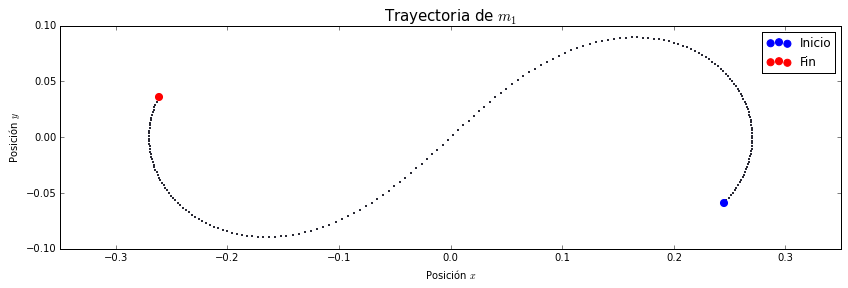

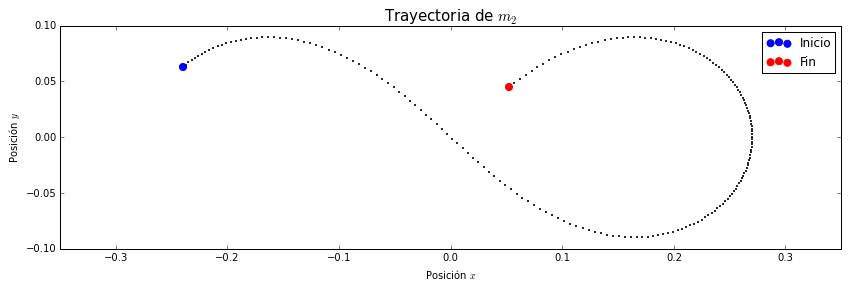

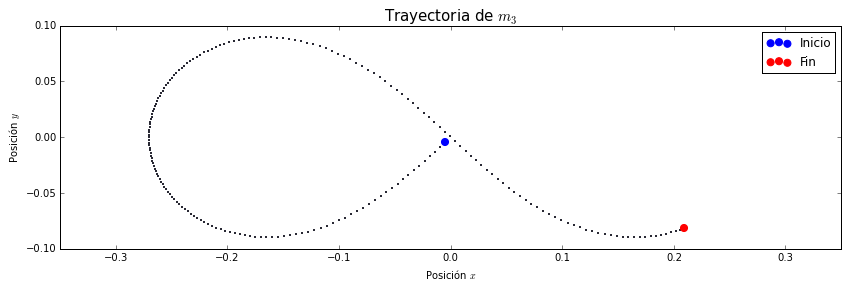

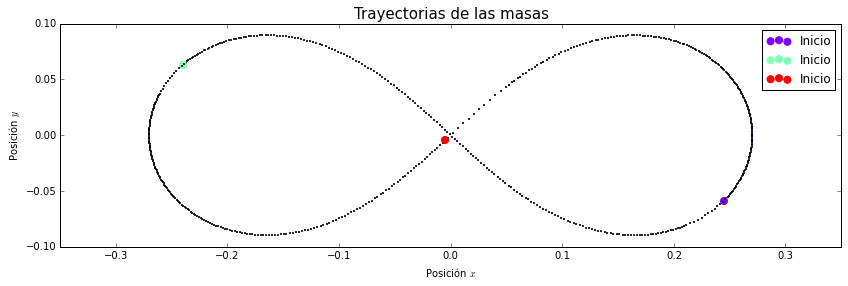

In [9]:
#Corremos la simulación para media unidad de tiempo y graficamos resultados.
hist=simulacion(numIter=200,Y=YN3,tmax=0.5)
graficador(hist,masa=1)
graficador(hist,masa=2)
graficador(hist,masa=3)
graficador(hist)

###(b) Las trayectorias son periódicas, calcule el periodo con por lo menos tres cifras significativas.

In [10]:
#Encuentra el periodo de las trayectorias utilizando el método de la bisección.
def tfinder(Y,rangoa=0.70,rangob=0.80,iteraciones=5,epsilon=0.001,**args): #Definimos un epsilon pequeño que sea el margen de error.
    mejorT = -1  #Como definimos T = -1, en caso de no cumplirse la condición de ser menor al epsilon se retorna -1 como
        #signo de error
    menorDistancia = 100000
    termino = False
    iteractual = 0
    while (iteractual < iteraciones):
        rangoBusqueda = np.linspace(rangoa,rangob,11)
        for i in rangoBusqueda:
            #Corremos la simulación con varios tmax hasta encontrar el que sea el periodo.
            history=simulacion(numIter=200,Y=Y,tmax=i)
            inicio = np.array([history[:,0][:,0][0],history[:,0][:,1][0]])
            fin = np.array([history[:,0][:,0][-1],history[:,0][:,1][-1]])
            distancia = norm(inicio - fin)
            if (distancia <= epsilon):#En caso de la distancia ser menor al epsilon se define el tmax acutal como el
                                    #periodo y se frena el ciclo.
                mejorT = i
                termino = True
                break
            if (distancia <= menorDistancia):
                menorDistancia = distancia
                mejorT = i
        if (termino == True):
            print('Terminé y lo encontré :)')
            break
        nuevoRango = np.absolute(rangoBusqueda[5] - mejorT)
        rangoa = mejorT - nuevoRango #Renueva los límites del rango siguiendo el algoritmo de la bisección.
        rangob = mejorT + nuevoRango
        iteractual += 1
        print("Iteración número %d"%iteractual)
    return(mejorT)

In [11]:
#Utilizamos la función previamente definida para encontrar el periodo.
T = tfinder(Y=YN3,iteraciones=10)
print('El periodo de las trayectorias es de aproximadamente %.5f unidades de tiempo.'%T)

Iteración número 1
Iteración número 2
Terminé y lo encontré :)
El periodo de las trayectorias es de aproximadamente 0.79480 unidades de tiempo.


###(c) Haga una animación de las trayectorias de los tres cuerpos.

In [12]:
#Corremos la simulación nuevamente, pero esta vez para el periodo encontrado. Luego utilizamos la función que crea
#la animación previamente definida.
hist=simulacion(numIter=200,Y=YN3,tmax=T)
animador(hist)

###La animación se puede encontrar en el siguiente [enlace](https://raw.githubusercontent.com/diegolramirez/MC/master/Tareas/HW5/gravchorN3.gif).

#Punto 1) 4-Coreografía

###Cuatro masas bajo la influencia de su mutua fuerza de gravedad y siguientes condiciones iniciales tienen un movimiento periódico para cierto valor de a ($m_1\ =\ m_2\ =\ m_3\ =\ m_4\ =\ G\ =\ 1$). Donde $0.70 < a < 0.78$.

In [13]:
def Y4(a):
    #Defino las ecuaciones iniciales
    b = 0.384277200514
    c = 0
    d = 0.0156823005697
    e = 0.13966430504
    f = 0.352912599375
    g = 2.01155925929
    h = 1.19817066623
    i = 1.63619158614

    #Se ordena la información de cada masa y la del total en Y basados en la explicación inicial.
    r1 = np.array([b,c])
    r2 = np.array([-d,-e])
    r3 = np.array([-f,c])
    r4 = np.array([-d,e])

    v1 = np.array([c,a])
    v2 = np.array([-g,-h])
    v3 = np.array([c,i])
    v4 = np.array([g,-h])

    #Se crean los vectores que con la información inicial de las masas
    return(np.array([r1,v1,r2,v2,r3,v3,r4,v4]))

In [14]:
#Creamos el vector con la información de las 4 masas. Asumiendo inicialmente un valor de a = 0.70
YN4 = Y4(a=0.70)

###(a)  Encuentre $a$ con cinco cifras significativas. Piense en una función objetivo que tenga un mínimo en la condición deseada, y cuando halla reducido el intervalo de búsqueda lo suficiente piense en otra que cambie de signo en la condición deseada.

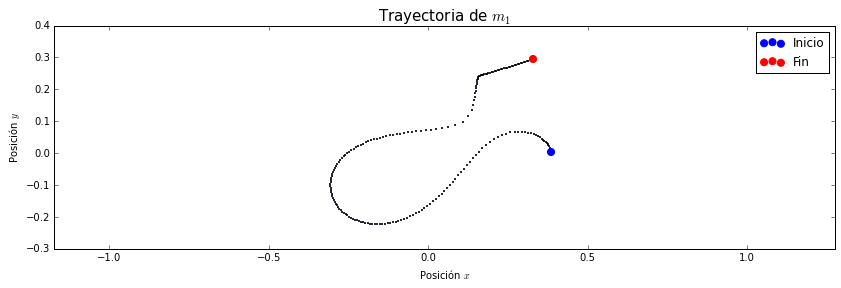

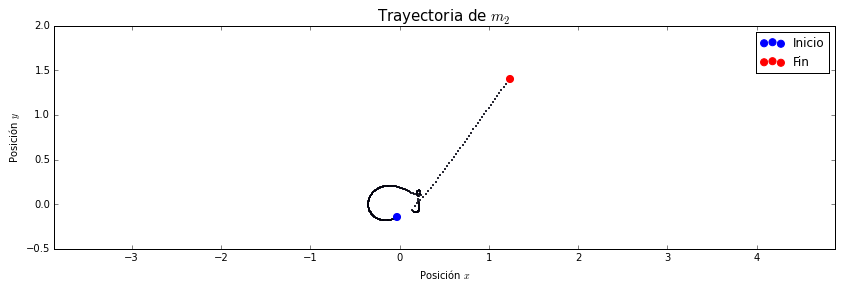

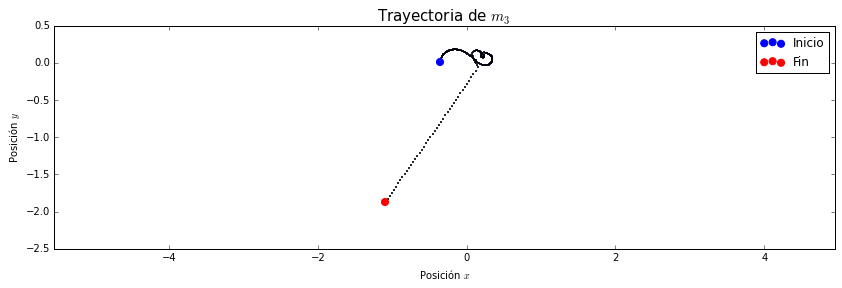

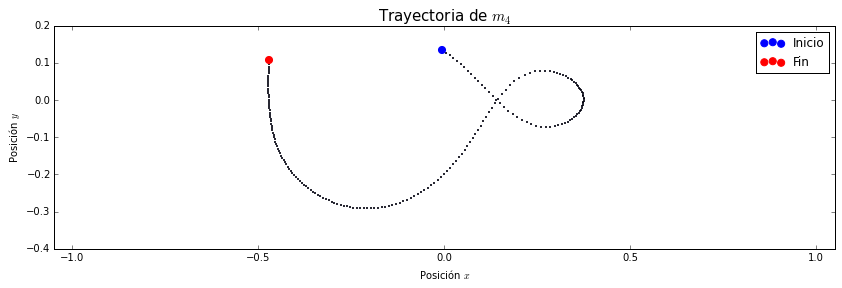

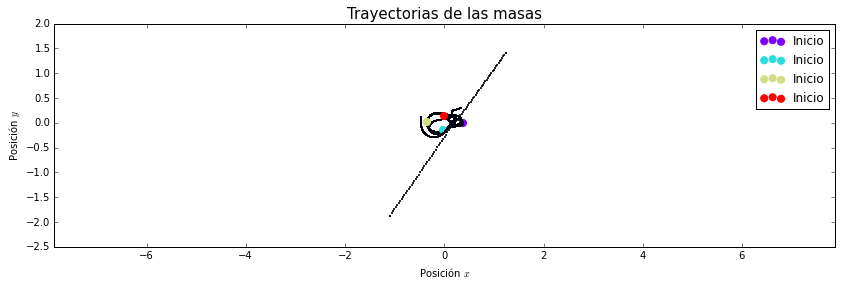

In [15]:
#Corremos la simulación para una unidad de tiempo y graficamos resultados.
hist=simulacion(numIter=200,Y=YN4,tmax=1)
graficador(hist,masa=1)
graficador(hist,masa=2)
graficador(hist,masa=3)
graficador(hist,masa=4)
graficador(hist)

In [16]:
#Encuentra el valor de a para el punto 2 utilizando el método de la bisección.
def afinder(Y,rangoa=0.70,rangob=0.78,iteraciones=5,epsilon=0.001,**args):#Definimos un epsilon pequeño que sea el margen de error.
    mejorA = -1 #Como definimos a = -1, en caso de no cumplirse la condición de ser menor al epsilon se retorna -1 como
        #signo de error
    menorDistancia = 100000
    termino = False
    iteractual = 0
    while (iteractual < iteraciones):
        rangoBusqueda = np.linspace(rangoa,rangob,11)
        for i in rangoBusqueda:
            Y[1,1] = i
            #Corremos la simulación con varios a hasta encontrar el que sea el que vuelva el movimiento periódico
            history=simulacion(numIter=200,Y=Y,tmax=1)
            inicio = np.array([history[:,0][:,0][0],history[:,0][:,1][0]])
            fin = np.array([history[:,0][:,0][-1],history[:,0][:,1][-1]])
            distancia = norm(inicio - fin)
            if (distancia <= epsilon):#En caso de la distancia ser menor al epsilon se define el mejorA acutal 
                                    #como el a definitivo y se frena el ciclo.
                mejorA = i
                termino = True
                break
            if (distancia <= menorDistancia):
                menorDistancia = distancia
                mejorA = i
        if (termino == True):
            print('Terminé y lo encontré :)')
            break
        nuevoRango = np.absolute(rangoBusqueda[5] - mejorA)
        rangoa = mejorA - nuevoRango #Renueva los límites del rango siguiendo el algoritmo de la bisección.
        rangob = mejorA + nuevoRango
        iteractual += 1
        print("Iteración número %d"%iteractual)
    return(mejorA)

In [17]:
#Utilizamos la función previamente definida para encontrar el valor de a que vuelve la trayectoria periódica.
a = afinder(Y=YN4,iteraciones=10)
print('El a necesario para quelas trayectorias sean periódicas es de aproximadamente %.5f.'%a)

Iteración número 1
Iteración número 2
Iteración número 3
Iteración número 4
Terminé y lo encontré :)
El a necesario para quelas trayectorias sean periódicas es de aproximadamente 0.75999.


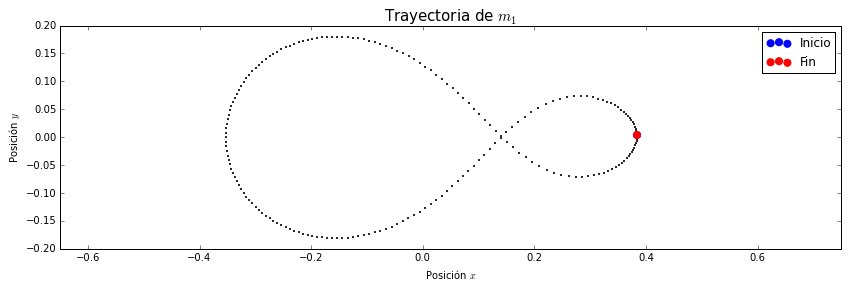

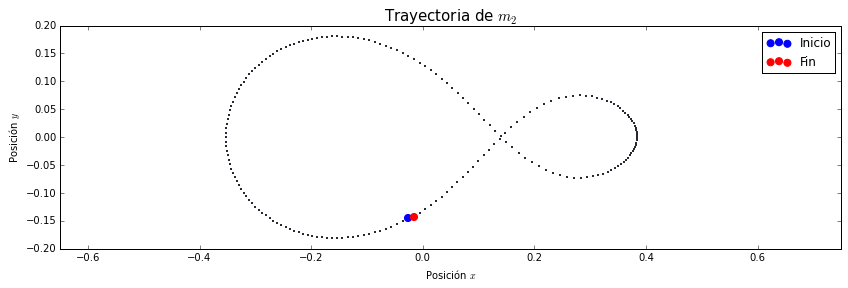

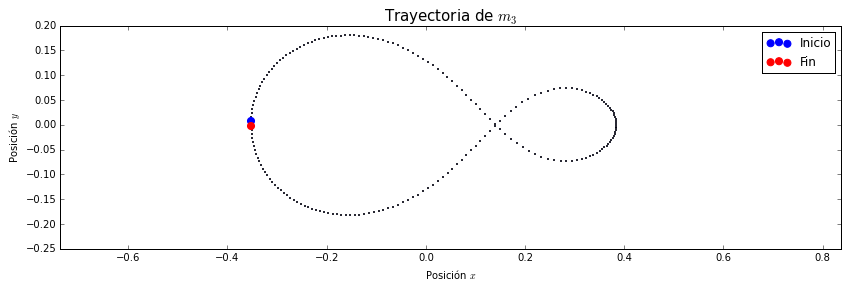

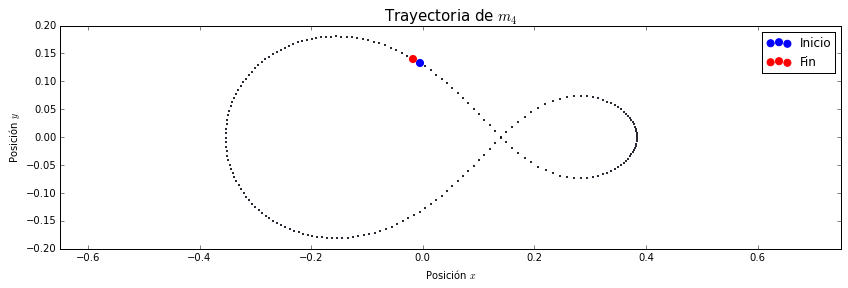

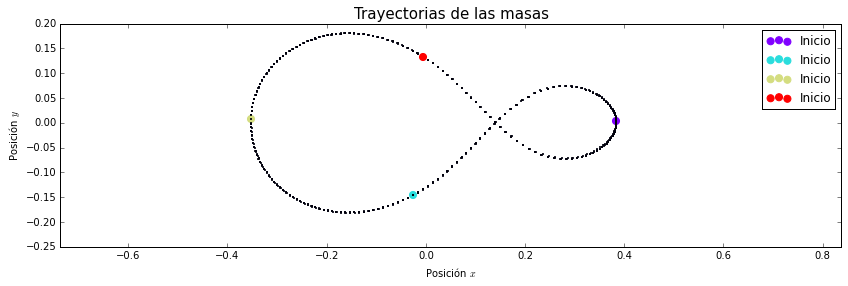

In [18]:
#Definimos Y nuevamente con el a correcto. Corremos la simulación nuevamente y graficamos resultados.
Y4nuevo = Y4(a)
hist=simulacion(numIter=200,Y=Y4nuevo,tmax=1)
graficador(hist,masa=1)
graficador(hist,masa=2)
graficador(hist,masa=3)
graficador(hist,masa=4)
graficador(hist,masa=0)

###(b) Con el valor de $a$ encontrado haga una gráfica con la energía cinética, la energía potencial y la energía total del sistema en función del tiempo.

In [19]:
#Basados en el inciso (3) y la fuente 1 definimos la función de energía potencial.
def U(Y):
    info = [] #Toda la información se guarda en esta variable local, que al final del método es retornada.
    for i in range(0,len(Y),2): #Este ciclo recorre cada una de las masas.
        u = 0
        #Este ciclo encuentra la energía potencial que siente cada una de las masas efectuada en relación a las demás.
        for j in range(0,len(Y),2):
            if (j > i): #Utilizamos esta condición para evitar calcular doble las fuerzas potenciales.
                u -= 1./norm(Y[i] - Y[j])
        info.append(u)
    informacion = np.array(info).sum()
    return(informacion)

In [20]:
#Basados en el inciso (4) y la fuente 1 definimos la función energía cinética.
def K(Y):
    info = [] #Toda la información se guarda en esta variable local, que al final del método es retornada.
    for i in range(1,len(Y),2): #Este ciclo recorre cada una de las masas.
        k = (norm(Y[i])**2)/2.
        info.append(k)
    informacion = np.array(info).sum()
    return(informacion)

In [21]:
#Definimos una función que recorre la historia de la simulación y encuentra y encuentra U, K y E.
def energias(history):
    energiaU=np.array([])#Creamos arrays que contendran la info de U y K.
    energiaK=np.array([])
    for i in history:#Recorremos la historia y hallamos U y K en cada step.
        energiaU=np.append(energiaU,[U(i)],axis=0)
        energiaK=np.append(energiaK,[K(i)],axis=0)
    total = energiaU + energiaK #Sumamos energías U + K para hallar E.
    return (np.array([energiaU,energiaK,total]))

In [22]:
#Corremos la función que encuentra las energías.
eU,eK,eT = energias(hist)
#Definimos un linspace que representa el tiempo.
t = np.linspace(0,1,len(hist))

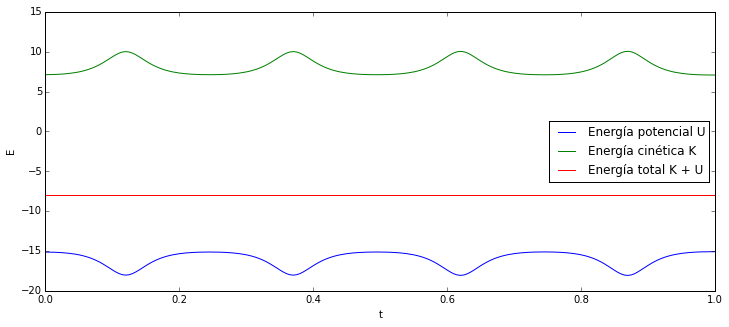

In [23]:
#Hacemos la gráfica de U,K,E.
plt.figure(figsize=(12,5))
plt.plot(t,eU,label='Energía potencial U',color='blue')
plt.plot(t,eK,label='Energía cinética K',color='green')
plt.plot(t,eT,label='Energía total K + U',color='red')
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc=0)

###(c) Haga una animación de las trayectorias de los cuatro cuerpos.

In [24]:
#Hacemos la animación con la función previamente definida.
animador(hist)

###La animación se puede encontrar en el siguiente [enlace](https://raw.githubusercontent.com/diegolramirez/MC/master/Tareas/HW5/gravchorN4.gif).